In [78]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
#Showing directories’ size
import os, shutil

train_dir ='/content/drive/MyDrive/images/train'
validation_dir = '/content/drive/MyDrive/images/val'
test_dir = '/content/drive/MyDrive/images/test'

train_corona_virus_d = '/content/drive/MyDrive/images/train/Corona_Virus_Disease'
train_normal = '/content/drive/MyDrive/images/train/Normal'
train_tuberculosis= '/content/drive/MyDrive/images/train/Tuberculosis'

val_corona_virus_d = '/content/drive/MyDrive/images/val/Corona_Virus_Disease'
val_normal = '/content/drive/MyDrive/images/val/Normal'
val_tuberculosis= '/content/drive/MyDrive/images/val/Tuberculosis'

test_corona_virus_d = '/content/drive/MyDrive/images/test/Corona_Virus_Disease'
test_normal = '/content/drive/MyDrive/images/test/Normal'
test_tuberculosis= '/content/drive/MyDrive/images/test/Tuberculosis'


print('total train corona virus images:', len(os.listdir(train_corona_virus_d)))
print('total train normal images:', len(os.listdir(train_normal)))
print('total train tuberculosis images:', len(os.listdir(train_tuberculosis)))


print('total validation corona virus images:', len(os.listdir(val_corona_virus_d)))
print('total validation normal images:', len(os.listdir(val_normal)))
print('total validation tuberculosis images:', len(os.listdir(val_tuberculosis)))


print('total testing organic corona virus img:', len(os.listdir(test_corona_virus_d)))
print('total testing recicle normal imgs:', len(os.listdir(test_normal)))
print('total testing recicle tuberculosis img:', len(os.listdir(test_tuberculosis)))

total train corona virus images: 1218
total train normal images: 1207
total train tuberculosis images: 1220
total validation corona virus images: 406
total validation normal images: 402
total validation tuberculosis images: 406
total testing organic corona virus img: 407
total testing recicle normal imgs: 404
total testing recicle tuberculosis img: 408


In [80]:
from keras.utils import image_dataset_from_directory

IMG_SIZE = 150
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    label_mode='categorical',
    seed = 100
)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=64,
    label_mode='categorical',
    seed = 100
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=64,
    label_mode='categorical',
    seed = 100
)

Found 3645 files belonging to 3 classes.
Found 1214 files belonging to 3 classes.
Found 1219 files belonging to 3 classes.


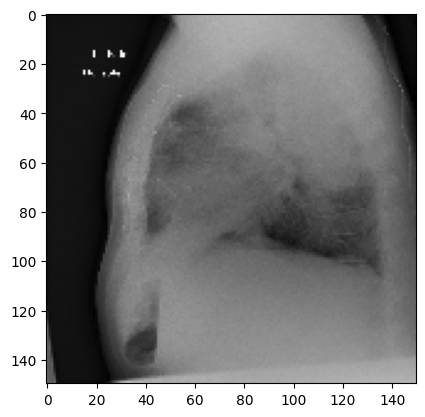

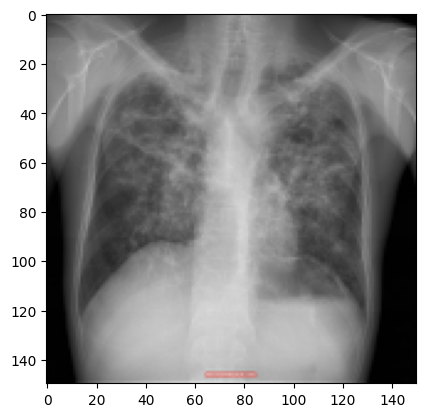

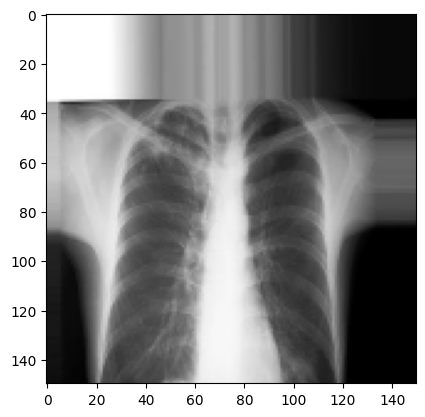

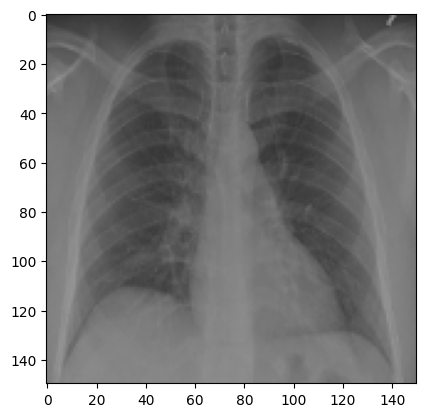

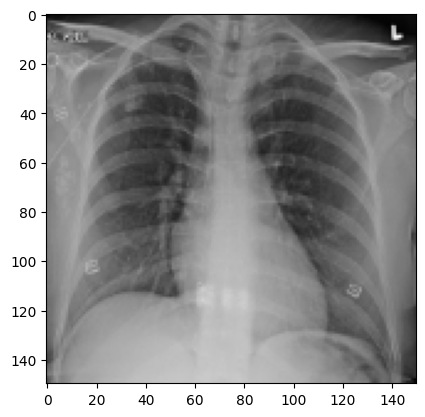

In [81]:
#Viewing the first 5 images of the first batch
import matplotlib.pyplot as plt
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [82]:
# Definir la capa de data augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

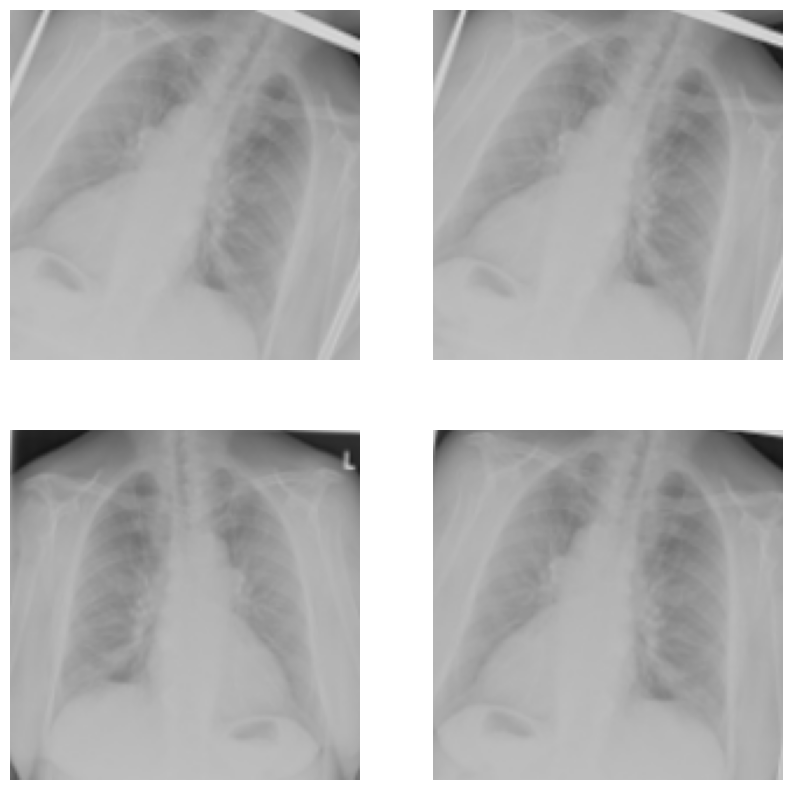

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(4):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [84]:
from keras.applications.vgg16 import VGG16

# Crear el modelo base de VGG16 preentrenado en ImageNet
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

In [85]:
# Congelar las capas de la base convolucional para que no se entrenen inicialmente
conv_base.trainable = False

In [86]:
from tensorflow import keras
from keras import layers, models

# Construir el modelo
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = conv_base(x, training=False)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 sequential_4 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                 771 

In [89]:
import tensorflow as tf
# Compilar el modelo
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=['acc'])

In [90]:
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
    keras.callbacks.ModelCheckpoint(filepath="best_model.keras", save_best_only=True,monitor='val_loss')
]

In [91]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    verbose=1,
    callbacks=callbacks_list
)

Epoch 1/10
114/114 [==============================] - 60s 504ms/step - loss: 4.7781 - acc: 0.6148 - val_loss: 1.2161 - val_acc: 0.8418
Epoch 2/10
114/114 [==============================] - 52s 436ms/step - loss: 2.2693 - acc: 0.7695 - val_loss: 0.8618 - val_acc: 0.8839
Epoch 3/10
114/114 [==============================] - 59s 497ms/step - loss: 1.6762 - acc: 0.8121 - val_loss: 0.6476 - val_acc: 0.9135
Epoch 4/10
114/114 [==============================] - 53s 447ms/step - loss: 1.2846 - acc: 0.8326 - val_loss: 0.5611 - val_acc: 0.9226
Epoch 5/10
114/114 [==============================] - 59s 501ms/step - loss: 1.0205 - acc: 0.8584 - val_loss: 0.5107 - val_acc: 0.9300
Epoch 6/10
114/114 [==============================] - 53s 447ms/step - loss: 0.8741 - acc: 0.8691 - val_loss: 0.4824 - val_acc: 0.9333
Epoch 7/10
114/114 [==============================] - 52s 433ms/step - loss: 0.7713 - acc: 0.8850 - val_loss: 0.4672 - val_acc: 0.9226
Epoch 8/10
114/114 [==============================] - 5

In [92]:
# Descongelar las últimas capas de la base convolucional para fine-tuning
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

0 input_11 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [93]:
# Compilar el modelo nuevamente con un learning rate más bajo para fine-tuning
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),
    metrics=['acc'])

In [94]:
# Entrenar el modelo nuevamente con fine-tuning
history_fine = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    verbose=1,
    callbacks=callbacks_list
)

Epoch 1/10
114/114 [==============================] - 54s 437ms/step - loss: 0.5431 - acc: 0.8971 - val_loss: 0.2790 - val_acc: 0.9374
Epoch 2/10
114/114 [==============================] - 51s 425ms/step - loss: 0.3784 - acc: 0.9117 - val_loss: 0.2233 - val_acc: 0.9481
Epoch 3/10
114/114 [==============================] - 52s 443ms/step - loss: 0.3243 - acc: 0.9232 - val_loss: 0.1972 - val_acc: 0.9530
Epoch 4/10
114/114 [==============================] - 60s 508ms/step - loss: 0.3094 - acc: 0.9237 - val_loss: 0.1821 - val_acc: 0.9572
Epoch 5/10
114/114 [==============================] - 52s 435ms/step - loss: 0.1973 - acc: 0.9374 - val_loss: 0.1713 - val_acc: 0.9498
Epoch 6/10
114/114 [==============================] - 49s 415ms/step - loss: 0.2039 - acc: 0.9460 - val_loss: 0.1924 - val_acc: 0.9572
Epoch 7/10
114/114 [==============================] - 53s 452ms/step - loss: 0.1852 - acc: 0.9501 - val_loss: 0.1649 - val_acc: 0.9596
Epoch 8/10
114/114 [==============================] - 5

In [97]:
model.save('./ModelT_FineTuning_WithAug_xray.keras')

In [98]:
keras.models.load_model('./ModelT_FineTuning_WithAug_xray.keras')

In [99]:
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

38/38 [==============================] - 15s 297ms/step - loss: 0.1166 - acc: 0.9629
val_acc: 0.9629324674606323


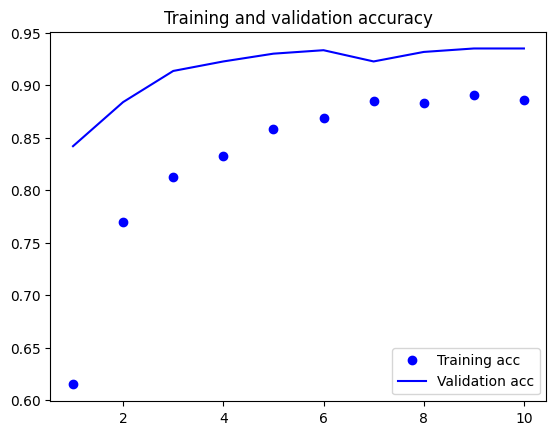

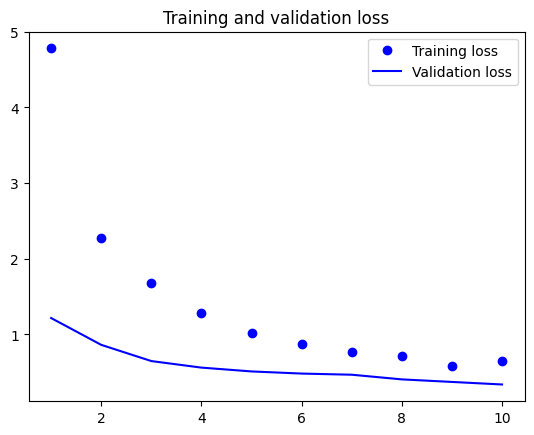

In [100]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [101]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

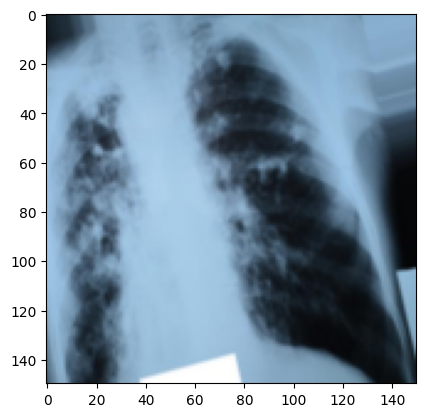

(1, 150, 150, 3)
1/1 [==============================] - 1s 738ms/step
Class index: [2]
One-hot encoded prediction: [[0. 0. 1.]]


In [102]:
# img = tf.keras.preprocessing.image.load_img('./train/cats/cat.1.jpg', target_size=(150, 150), interpolation='bilinear')
img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/images/val/Tuberculosis/test_0_274.jpeg', target_size=(150, 150), interpolation='bilinear')
plt.imshow(img)
plt.show()
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)

# Convert prediction to class index (0, 1, 2)
class_index = np.argmax(result, axis=1)

# Convert class index to one-hot encoded vector
one_hot_prediction = to_categorical(class_index, num_classes=3)

# Print the result
print("Class index:", class_index)
print("One-hot encoded prediction:", one_hot_prediction)

1/1 [==============================] - 0s 21ms/step


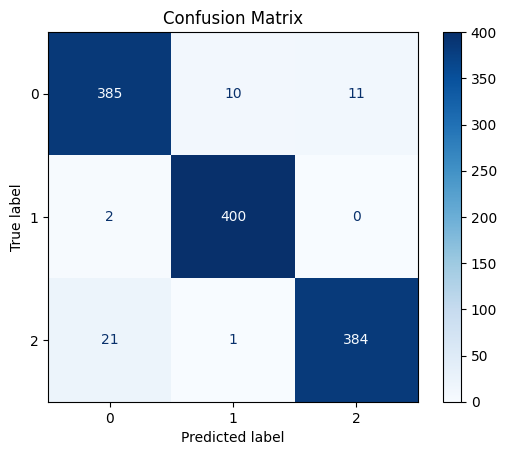

Classification Report:
                       precision    recall  f1-score   support

Corona_Virus_Disease       0.94      0.95      0.95       406
              Normal       0.97      1.00      0.98       402
        Tuberculosis       0.97      0.95      0.96       406

            accuracy                           0.96      1214
           macro avg       0.96      0.96      0.96      1214
        weighted avg       0.96      0.96      0.96      1214



In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Inicializar listas para almacenar etiquetas verdaderas y predicciones
true_labels = []
predictions = []

# Iterar a través del conjunto de validación y predecir
for images, labels in validation_dataset:
    preds = model.predict(images)
    predictions.extend(preds)
    true_labels.extend(labels.numpy())

# Convertir las listas a arrays de numpy
predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Si las etiquetas verdaderas están en formato one-hot encoded, convertirlas a etiquetas enteras
if true_labels.ndim == 2 and true_labels.shape[1] > 1:
    true_labels_int = np.argmax(true_labels, axis=1)
else:
    true_labels_int = true_labels

# Asegurarse de que las predicciones son probabilidades y luego convertirlas a etiquetas enteras
predictions_int = np.argmax(predictions, axis=1)

# Crear la matriz de confusión
cm = confusion_matrix(true_labels_int, predictions_int)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Generar y mostrar el reporte de clasificación
report = classification_report(true_labels_int, predictions_int, target_names=validation_dataset.class_names)
print("Classification Report:\n", report)